# Self Organizing Map for Data Visualization and Clustering

## Introduction
A Self Organizing Map (SOM) is a type of neural network that is trained using unsupervised learning on unlabeled data. In contrast to a standard neural network a SOM only has input and output layer (no hidden layer in middle, but rather a SOM layer), SOM does not need a target output, and is trained using competetive learning in which the neurons (weights asscociated with nodes in output layer) compete for activation (not minimizing error using backpropogation). It is used to visualize high dimensional data in lower dimensions (usually two dimensions) and classify observations into clusters. SOM preserve the topology of the training data when mapping it to a lower demensional space, hence the grouping patterns in the lower demsional data will be consistent to the original training data. 

The figure below illustraties the idea behind SOM data reduction.

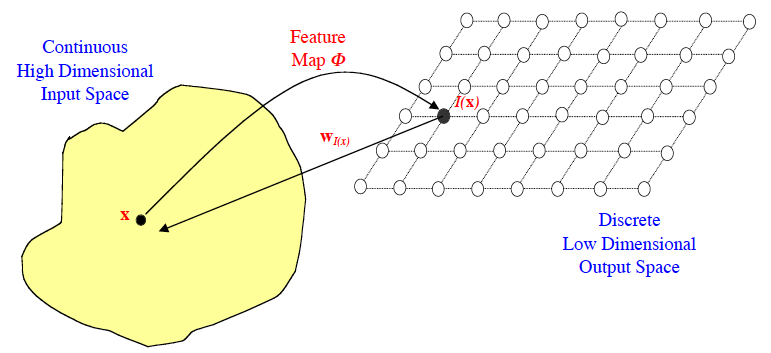

In [2]:
from IPython.display import Image, display
display(Image(filename='SelfOrgMap.png', embed=True))

In the above figure, the yellow blob on the left represents some continuous high dimensional input data, and the finite grid of nodes on the right is the 2D output layer. Notice that each output node is associated with a weight vector (also known as a neuron) that lies in the same dimension as the input data. The input data are mapped to nodes in the output layer whose weight vector is closest to them (its possible for multiple inputs to map to same output node).

SOM methadology has similarities to Principal Components Analysis (PCA is used for demensionality reduction) and K-Means (used for clustering). In K-means the initialized centroids get updated over itterations independantly, but in SOM a subset of the neurons (weight vectors associated with output nodes) get updated together (more on this below). In PCA, the orginal training data is projected onto a linear surface (line, plane, hyperplane), but this linear projection constraint does not apply to SOM.

## Intuition behind Self Organizing Map

To build our intuition behind the SOM algorithm, lets consider a simple example of when we have 4 data points in a 2D input space and want to transform it into a discrete 1D output layer. In the figure below, the crosses in blue represent the input vectors, and the 4 circles connected by a black line are weights (also known as neurons) of the 4 nodes in the output layer. Notice that the weights are in the same space as the input data, and hence are also 2D. Intuitively speaking, the generals steps implement SOM algorithm are

1) Randomly initialize the weights. This is shown the top-left figure as the 4 black circles. 

2) From the input data we randomly choose a point. This is shown in top-right figure as a marked circle. 

3) We determine the weight vector which is closest to the chosen point in 2). This is the winning neuron, shown as a solid diamond in the top-right figure. 

4) The winning neuron and its closest neighbouring neurons (the weights) move closer to the chosen point in 2). The neurons closer to the chosen point in 2) take larger steps towards the point in 2) relative to neurons further away. This is shown as the red arrows in the top-right figure. 

5) Steps 2-4 above are repeated many times (say 1000 times) and it results in the weight vectors to settle into stable zones that represent the patterns in the input data. Note that in each itteration, the step size for updating the weights and the amount of weights to be updated decreases accross itterations. The figures on bottom-right and bottom-left represent the next two itterations in the SOM algorithm. 

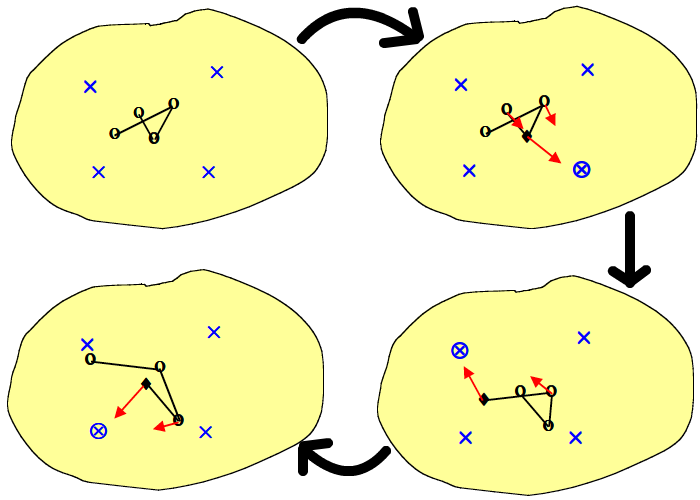

In [5]:
display(Image(filename='SOMIntuition.png', embed=True))

Now it should be clear why it was mentioned in the introduction that SOM is trained using competetive learning. Each neuron competes against other neurons to be activated. After competing for many itterations the neurons adapt to the patterns in the input data. 

## Application of Self Organizing Maps

A common example of SOM is to project 3D data of color values (red,green,blue) onto 2D. In particular, suppose we have input data $(x_{1},\ldots, x_{n}),$ where $x_{i} \in \mathbb{R}^{3},$ each of the three coordinates in $x_{i}$ represent $(red,green,blue)$ values ranging from 0 to 255. We could plot this data in 3D with three axis, but we can also use SOM to display the data in 2D with two axis. Suppose the SOM contained a 40x40 grid of nodes in the output layer, with each node being associated with a 3 dimensional weight vector, $w_{i} \in \mathbb{R}^{3}.$ Then the resulting SOM in this context can look like (The figure below is not drawn to scale, more for intuition):

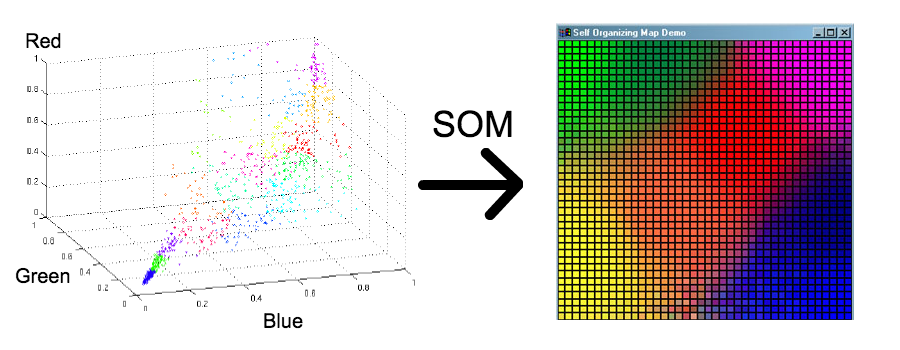

In [4]:
display(Image(filename='RGBreduce.png', embed=True))

The above figure is a illustration of 1600 nodes (40x40) in the output layer and clearly shows the clustering of eight different colors. Therefore the SOM has given us labels for our training data, so the resulting lableled data is $\{(x_{1},c_{1}),\ldots,(x_{n},c_{n})\},$ where $c_{i} \in (red, green, \ldots, blue)$ is the color label for each data point $x_{i} \in \mathbb{R}^{3}.$

Suppose now instead of having data on colours, we have data on countries around the world. For example for each country we could have features such as gross domestic product, health, happiness level, education, and income. We may now be interested in visualizing this higher demensional data (more than 3 features) on 2D to compare the quality of life across countries. This excercise has been done before using SOM and results in the worlds poverty map:

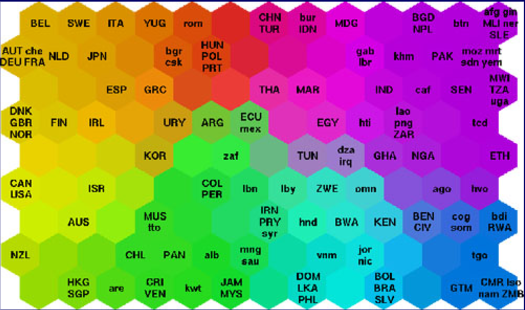

In [6]:
display(Image(filename='WorldPoverty.png', embed=True))

The SOM transforms our high demensional country level data into a nice 2D representation above. In the above poverty map, countries with similar quality of life are bunched together. Countries with high quality of life such as Sweden, Finland, and Canada are on top left, whereas the lower quality of life countries such as Guatemala and Rwanda are on bottom right. You may notice in the above figure that not all the nodes (hexagons) have a country assigned to them, this indicates a sepration layer between clusters of countries. For example in the bottom left we see that New Zealand quality of life seems to be unique and not very similar to any other country. 

## Data Description and Problem

In 1985 the state of Tennessee began The Student/Teacher Achievement Ratio (STAR) Project which was a four-year longitudinal class-size study funded by the State Department of Education. About 11,000 students in 79 schools were randomly assigned into small and large classes. The data set for this study is publicly available, we will use a small subset of it here. In particular, we will use 6 input variables for grade 1 students, students free or reduced price lunch status, number of days absent in a school year, and standardized Stanford Achievement Test scores for Reading, Math, Listening, and Word Study. 

In [15]:
# Import dependencies
# numpy for matrix algbera
import numpy as np
# Pandas for data manipulation
import pandas as pd
# matplotlib for data visualization
import matplotlib.pyplot as plt

# Set seed so we get same random allocation on each run of code
np.random.seed(2017)

# Load the IMDB data
educ_data = pd.read_csv("Grade1Students.csv")

# Show structure of data set
educ_data.head()

,g1freelunch,g1absent,g1readscore,g1mathscore,g1listeningscore,g1wordscore
0,1,9,516,578,601,493
1,0,12,451,507,584,436
2,1,4,483,526,529,486
3,1,15,516,505,556,536
4,1,2,433,463,504,426


The data above is 6 dimensional, because we observe 6 characteristics for each student. In terms of clustering, we can split student's into three categories, weak, average, and gifted. A student in the "weak" category would be of low socioeconomic status (recieved free or reduced price lunch), is absent many school days, and has low test scores. The other categories can be defined similarly. Knowing which category a student belongs to could help teacher's identify the students that need the most indivisual help (probably the students in the "weak" category). Although grouping the data like this seems interesting, its not clear what rule we should use to construct these groups. Notice that this data set is "unlabelled" in the sense that we don't know what category of ability the student belongs to. This is where we will apply unsupervised learning, specifically SOM to map each observation into one of three clusters. 

## Summary Statistics and Data Cleaning

The summary statistics table below shows we have a sample of $n = 5550$ grade 1 students with about half of them that recieve free or reduced price lunch, and the average student is absent about $7$ times in a year. We have standardized test score data on reading, math, listening, and word study. The scales for these standardized test scores roughly range from 400 to 700.

In [16]:
# Summary statistics for data set (mean, stdev, min, max, etc)
educ_data.describe()

,g1freelunch,g1absent,g1readscore,g1mathscore,g1listeningscore,g1wordscore
count,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000,5550.000000
mean,0.500901,7.421261,521.307207,531.456216,567.824324,514.643063
std,0.500044,7.004582,55.278448,43.151113,33.562973,52.858396
min,0.000000,0.000000,404.000000,404.000000,477.000000,317.000000
25%,0.000000,2.000000,478.000000,502.000000,543.000000,475.000000
50%,1.000000,6.000000,516.000000,529.000000,565.000000,514.000000
75%,1.000000,10.000000,558.000000,562.000000,588.000000,551.000000
max,1.000000,84.000000,651.000000,676.000000,708.000000,601.000000


Since we have data on different scales, for simplicity purpose will normalize all our variables so that they are on the same scale (this may also help speed up our SOM algorithm). One popular method to do this is to standardize each variable to have mean 0, and variance 1. Specefically, if we have input $x_{i},$ we can standardize by subtracting its mean and then dividing by its standard deviation, $\frac{(x_{i} - mean(x_{i})}{std(x_{i})}.$ Once the data is standardized, we can interpret the values of each variable as standard deviations away from the average student. For example, if a student scores $0.65 \sigma$ in math, that means this student scored $0.65$ standard deviations better in math than the average student.  

In [17]:
# We will normalize each feature to have mean 0 and standard deviation 1
# This standardization is done to represent input data on the same scale

# Standardize free lunch status
educ_data["g1freelunch"] = (educ_data["g1freelunch"]-np.mean(educ_data["g1freelunch"]))/np.std(educ_data["g1freelunch"])

# Standardize absences 
educ_data["g1absent"] = (educ_data["g1absent"]-np.mean(educ_data["g1absent"]))/np.std(educ_data["g1absent"])

# Standardize reading score
educ_data["g1readscore"] = (educ_data["g1readscore"]-np.mean(educ_data["g1readscore"]))/np.std(educ_data["g1readscore"])

# Standardize math score
educ_data["g1mathscore"] = (educ_data["g1mathscore"]-np.mean(educ_data["g1mathscore"]))/np.std(educ_data["g1mathscore"])

# Standardize listening score
educ_data["g1listeningscore"] = (educ_data["g1listeningscore"]-np.mean(educ_data["g1listeningscore"]))/np.std(educ_data["g1listeningscore"])

# Standardized word study score
educ_data["g1wordscore"] = (educ_data["g1wordscore"]-np.mean(educ_data["g1wordscore"]))/np.std(educ_data["g1wordscore"])

## Algorithm to implement Self Organizing Map

In SOM we have a input layer consisting of data $(x_{1},\ldots, x_{n}),$ $x_{i} \in \mathbb{R}^{m},$ and output layer consisting of a finite number of nodes $(z_{1},\ldots,z_{k}),$ $z_{i} \in \mathbb{R}^{q},$ in lower demensional space (q < m, usually q = 2, grid of nodes on 2D plane). Each node in the output layer $z_{i}$ is associated with a weight vector $w_{i}$ (also known as neuron) which is the same dimension as the input data. In training, the weight vectors $(w_{1},\ldots, w_{k}),$ $w_{i} \in \mathbb{R}^{m},$ are adjusted so that they are close as possible to the input vector while preserving the topography of the input data. 

The general steps for implementing SOM are:

1) Randomly initialize each output node's weights, $(w_{1}^{0},w_{2}^{0},\ldots,w_{n}^{0}).$ 

2) Choose data point at random from input data, $x_{i}^{*}.$ 

3) Find node with associated weight vector which is closest to $x_{i}^{*}.$ This is known as the winning neuron, or the best matching unit (BMU). That is $$w_{BMU}= \text{argmin}_{w_{j}}||w_{j}-x_{i}^{*}||^2,$$ where $||.||$ is the euclidean norm. The corresponding node in the output layer to $w_{BMU}$ is $z_{BMU}.$

4) Determine the neighbouring vectors around the winning neuron $w_{BMU}.$ To do this we define a radius of size $N(t) = N_{0}exp(\frac{-t}{\lambda}),$ where $t$ is the itteration, $N_{0}$ is the initial radius, $\lambda$ is ratio of total itterations and $N_{0}.$ Its important to note that these neighbouring neurons are found on the lower dimensional layer of output nodes (usually 2D plane) first. Hence the neurons to be updated in the itteration are those weight vectors associated to nodes in the output player within $N(t)$ distance of $z_{BMU}.$

5) Weights are adjusted so that the winning node and its neighbours become closer to the input $x_{i}^{*}.$ Specefically, $$w_{i}^{t+1} = w_{i}^{t} + \phi(t,w_{i})L(t)(x_{i}^{*}-w_{i}^{t}),$$ where $t$ is the itteration, $\phi(t,w_{i}) = exp(\frac{-||w_{BMU}-w_{i}||^2}{2N(t)^2}),$ and learning rate $L(t) = L_{0}exp(\frac{-t}{\text{Total Itterations}}),$ and $L_{0}$ is initial learning rate.

6) Repeat above steps 2-5 several times, say 1000 itterations (the itterations usually depend on data size and input data dimensionality)

Note that the learning rate and BMU neighbourhood radius size is decreasing exponentially over itterations (other formulas can be used for decay, exponential seems to be common). Since the learning rate $L(t)$ is decreasing to $0$ over itterations, we expect the algorithm to eventually converge. In the step 4 the $\phi(t,w_{i})$ term says that weights closer to $w_{BMU}$ will be moved closer to the input $x_{i}$ relative to weight further away from the winning neuron (notice $\phi(t,w_{i})$ is similar to the bell curve normal distribution function). For example if $w_{i} = w_{BMU},$ then $\phi(t,w_{i}) = 1$ its maximal value, hence the best matching unit (weight closest to chosen data point) will be updated the most. 

## Applying SOM to Seprate Students Into Three Ability Groups
Now we will implement the above SOM algorithm and use the following input data on students, 
$$\{(FreeLunch_{i},Absences_{i},Read_{i},Math_{i},Listening_{i},WordStudy_{i})\}_{i=1}^{n = 5550},$$
to classify each student as weak, average, or gifted. Since we want 3 clusters, we will be using 3 output nodes where each node will be associated with a 6 dimensional weight vector (same dimension as input). Once we apply the SOM algorithm above, the three weight vectors $(w_{1}^{t},w_{2}^{t},w_{3}^{t}),$ where t is the itteration, will converge to $(w_{1}^{*},w_{2}^{*},w_{3}^{*}).$ We can then used these finialized weight vectors as centroids to our three clusters, so the students whose characteristics are closest to $w_{3}^{*}$ will be assigned to the group $3$. We can similarly use the centroids $w_{2}^{*}$ and $w_{3}^{*}$ to classify students as group $2$, and group $3$ respectively. Once we have our 3 groups, we can look the summary statistics for students in the three groups and classify them as weak, average, or gifted. Since we only have 3 weights, for simplicity we will set $\phi(t,w_{i}) = 1$ and hence only update the BMU in each itteration. 

In [18]:
# Initialize total number of itterations (remember n = 5550)
total_itter = 3*len(educ_data.index)

# Initialize number of output nodes
nodes_num = 3

# Dimension of input data
input_dim = len(educ_data.columns)

# Initialize parameters for learning rate 
learn_init = 0.1

# Step 1: Initialize the weight vectors 
# Randomly generated matrix with entries between [-2,2], each column is a weight vector 
Weight_mat = 4*np.random.rand(input_dim,nodes_num)-2

# Show initialized weight matrix
print "Initialized weight matrix,", Weight_mat

# Start SOM algorithm itterations
for itter in range(total_itter):
    
    # Initialize distance from weight to chosen point (will be updated in inner loop)
    dist_bmu = float("inf")
    
    # Step 2: Choose data point at random from input data
    
    # Select row index at random
    row_index = np.random.randint(len(educ_data.index))
    
    # Get corresponding data vector
    data_chosen = educ_data.loc[[row_index]]
    
    # Step 3: Find the weight vector that is closest to chosen point
    for node in range(nodes_num):
        
        # Compute euclidean distance from weight vector to chosen point
        dist_neuron = np.linalg.norm(data_chosen-Weight_mat[:,node])
        
        # Save the node with shortest distance of its neuron to chose point
        if dist_neuron < dist_bmu:
            
            # Update distance from weight to chosen point
            dist_bmu = dist_neuron
            
            # Best matching unit (BMU)
            weight_bmu = Weight_mat[:,node]
            index_bmu = node
            
    # Step 4: Define radius of winning neuron neighbourhood 
    # We skip this step because we only have 3 neurons in our application
    
    # Define learning rate
    learn_rate = learn_init*np.exp(-itter/total_itter)
    
    # Step 5: Update weight vectors (w_{t+1} = w_{t} + L(t)*(x_{i} - w_{t}))
    Weight_mat[:,index_bmu] = np.add(weight_bmu,learn_rate*(np.subtract(data_chosen,weight_bmu)))

# Show trained weights
print "Trained weights from SOM,", Weight_mat

Initialized weight matrix, [[-1.9161591   1.06828066 -0.2083208 ]
 [-1.51783354  1.72309184  0.59820164]
 [-1.43731576 -1.07362265 -1.09409884]
 [-0.95978022 -1.548511    0.52761936]
 [-0.45076747 -0.73501752  0.52356238]
 [-0.82139567  1.77945812 -1.39349715]]
Trained weights from SOM, [[-0.67933666  0.9438164  -0.5277563 ]
 [-0.36970586  0.26241107  0.08508913]
 [-0.04492589 -0.81322999  1.42797693]
 [-0.01620479 -0.74816579  1.11809929]
 [ 0.10019266 -0.54810955  1.1153748 ]
 [ 0.01018571 -0.85753327  1.23366498]]


Now that we have a trained SOM map, we can use it to classify the students in our sample into three groups, weak, average, and gifted. As mentioned above, we will use the converged weights as centroids for our three clusters. Recall that the components in the weights are measured in standard deviation relative to the average student. Taking a quick look at the estimated weight vectors, notice that the last four components representing academic achivement on $w_{1}^{*}$ are close to $0 \sigma$, for $w_{1}^{*}$ they are close to $-0.8 \sigma$, and for $w_{3}$ they are close to $1 \sigma.$ This gives us a indication that the cluster represented by $w_{1}^{*}$ is for average achievers, $w_{2}^{*}$ cluster for low achievers, and finally $w_{3}^{*}$ group is for high scoring students. 

In [19]:
# Initialize vector the classifies each student into group 1,2,3
group = np.zeros(len(educ_data.index))
    
# Classify input data
for index, data in educ_data.iterrows():
    
    # Initialize distance from cluster centroid
    dist_cluster = float("inf")
    
    # Find closest weight centroid
    for centroid in range(nodes_num):
        
        # Compute euclidean distance from centroid vector to data point
        dist_centroid = np.linalg.norm(data-Weight_mat[:,centroid])

        # Save centroid that is closest to data piont
        if dist_centroid < dist_cluster:

                # Update distance from weight to chosen point
                dist_cluster = dist_centroid

                # Best matching unit (BMU)
                group[index] = centroid+1
            
# Add group classifier column 
educ_data["group"] = group

# See labeled data (last column contains labels)
educ_data.head()

,g1freelunch,g1absent,g1readscore,g1mathscore,g1listeningscore,g1wordscore,group
0,0.998200,0.225407,-0.096017,1.078720,0.988550,-0.409491,1.0
1,-1.001803,0.653737,-1.271988,-0.566809,0.481993,-1.487941,1.0
2,0.998200,-0.488476,-0.693049,-0.126456,-1.156865,-0.541932,2.0
3,0.998200,1.082066,-0.096017,-0.613161,-0.352334,0.404077,2.0
4,0.998200,-0.774029,-1.597642,-1.586573,-1.901800,-1.677142,2.0


In [20]:
# Let us figure out which group is weak, average, strong

# For group 1:
# Notice the test scores are close to 0 standard deviations away from the mean
# This is likely to be the "average" group
educ_data[educ_data.group == 1].describe()

,g1freelunch,g1absent,g1readscore,g1mathscore,g1listeningscore,g1wordscore,group
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.0
mean,-0.588563,-0.235502,-0.035926,0.024238,0.048750,0.047829,1.0
std,0.809965,0.721381,0.547815,0.622079,0.692355,0.642441,0.0
min,-1.001803,-1.059582,-1.543366,-1.864690,-1.901800,-1.866344,1.0
25%,-1.001803,-0.774029,-0.439763,-0.450926,-0.411929,-0.409491,1.0
50%,-1.001803,-0.345699,-0.005558,0.012603,0.005235,-0.012167,1.0
75%,-1.001803,0.082630,0.338187,0.476132,0.481993,0.404077,1.0
max,0.998200,3.652044,1.496067,2.214367,2.746598,1.633888,1.0


In [21]:
# For group 2:
# Notice that of students recieving free or reduced lunch much more than average, and
# are absent more than average, and have relatively lower test scores. 
#This is likely to be the "weak" group.
educ_data[educ_data.group == 2].describe()

,g1freelunch,g1absent,g1readscore,g1mathscore,g1listeningscore,g1wordscore,group
count,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.0
mean,0.847151,0.244311,-0.814091,-0.758617,-0.721961,-0.812927,2.0
std,0.528596,1.204693,0.538412,0.692439,0.666748,0.695914,0.0
min,-1.001803,-1.059582,-2.122306,-2.953984,-2.706331,-3.739441,2.0
25%,0.998200,-0.631252,-1.217713,-1.262102,-1.156865,-1.298739,2.0
50%,0.998200,-0.060146,-0.855876,-0.798573,-0.739701,-0.844655,2.0
75%,0.998200,0.796513,-0.475946,-0.265515,-0.262942,-0.295969,2.0
max,0.998200,10.933648,1.948363,1.611779,1.703688,1.179804,2.0


In [22]:
# Four group 3:
# The student test scores much higher than on average in this group, students
# are from advantageous backgrounds as lower proportion of students on free
# or reduced price lunch. This is the "gifted" group.
educ_data[educ_data.group == 3].describe()

,g1freelunch,g1absent,g1readscore,g1mathscore,g1listeningscore,g1wordscore,group
count,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.0
mean,-0.456090,-0.038593,1.288350,1.118996,1.028631,1.168219,3.0
std,0.891172,0.907254,0.632555,0.728524,0.852945,0.492043,0.0
min,-1.001803,-1.059582,-0.494038,-1.424338,-1.097270,-0.409491,3.0
25%,-1.001803,-0.774029,0.772392,0.592015,0.481993,0.687880,3.0
50%,-1.001803,-0.202923,1.242781,1.078720,0.988550,1.179804,3.0
75%,0.998200,0.368183,1.948363,1.611779,1.495106,1.633888,3.0
max,0.998200,6.793128,2.346384,3.350013,4.176874,1.633888,3.0


## Conclusion

Comparing the test scores, free or reduced price lunch status, and school absences across the three groups above, it seems like group $1$ is the "average" category (group $1$ has 1994 students), group $2$ is the "weak" category (group $2$ as 2145 students), and finally group $3$ is the "gifted" category (group $3$ has 1411 students). To classify the input data of student characteristics into the three groups, we used a unsupervised learning algorithm, the SOM. That is we did not initially have labeled data (we didn't know whether student was in weak, average, or gifted group), and also did not hard code any rules to define our groups. We told the SOM that we wanted to cluster our data into three groups, and it classified students into those three categories after thousands of itterations thorugh competetive learning. In terms for dimensionality reduction, we have used a SOM to transformed $6th$ dimensional feature vector for each student into one categorical variable. 